# Computer Assignment 2: 2D Convolution and Image Noise Removal
## Alaqian Zafar - aaz7118

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### **Problem 1** (Implementing 2D convolution in Python)
#### (a) Write 2D convolution function `conv2`, which implements "same"-padding convolution. For simplicity, you can assume the filter has an odd length in both vertical and horizontal directions. The input image should be grayscale. Assume pixel values outside the image are zero.

In [2]:
def conv2(image, filtr):
    result = np.empty(image.shape) # initialize result matrix
    pad_thick = int((len(filtr) - 1)/2) # padding thickness assuming square filter of odd legnth
    image = np.pad(image, pad_thick) # pad the image with zeros
    filtr = np.flip(filtr) # flip the filter
    # implement the convolution
    print(result.shape)
    for m in range(result.shape[0]):
        for n in range(result.shape[1]):
            result[m,n] = np.sum(np.multiply(image[m:m+len(filtr),n:n+len(filtr)],filtr))
    # normalize the image
    result = np.round((result-np.amin(result))*255/(np.amax(result)-np.amin(result)))
    return result

#### (b) Write a function `plot filtering` that uses your conv2 function to filter a given input image with a given input filter and plots the following:
- The original input image and filtered image
- The log-magnitude spectrum of the original image, filter, and output image.

#### Use a grayscale colormap and a colorbar for each plot. For your filter-response, use an FFT size equal to the size of your image.

In [3]:
def plot_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.colorbar()
    
def log_mag_spec(image, shape=None):
    return np.abs(np.fft.fftshift(np.fft.fft2(image, s=shape)))
    
def plot_filtering(image, filtr):
    # plot original image
    plot_image(image, 'original image')
    # Convert the image into a float for mathematical operations
    image = image.astype(np.float64)
    # plot the log-magnitude of the original image
    image_spectrum = 20*np.log(log_mag_spec(image))
    plot_image(image_spectrum, 'spectrum of original image')
    # log-magnitude of the filter
    filtr_spectrum = log_mag_spec(filtr, np.shape(image))
    plot_image(filtr_spectrum, 'spectrum of filter')
    # filtering the image
    image_filtr = conv2(image, filtr)
    # plot the log-magnitude of the filtered image
    image_filtr_spectrum = 20*np.log(log_mag_spec(image_filtr))
    plot_image(image_filtr_spectrum, 'spectrum of filtered image')
    # convert the imaege back to uint8
    image_filtr = image_filtr.astype(np.uint8)
    # plot the filtered image
    plot_image(image_filtr, 'filtered image')

#### (c) Use plot filtering on an image of your choice with the following 3 filters:
![Filters](1c_filters.png)
#### For each filter, discuss the result of filtering in both spatial and frequency domains. Explain how the filtering effect in the image domain correlates with the filter and its frequency response.

In [4]:
# load the image
image = cv2.imread('lena_gray.bmp',0)

![H1](1c_filters_H1.png)

![H2](1c_filters_H2.png)

(512, 512)


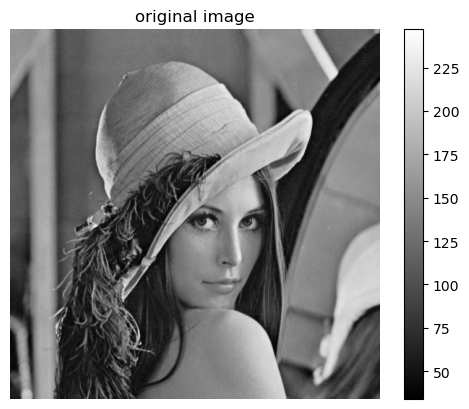

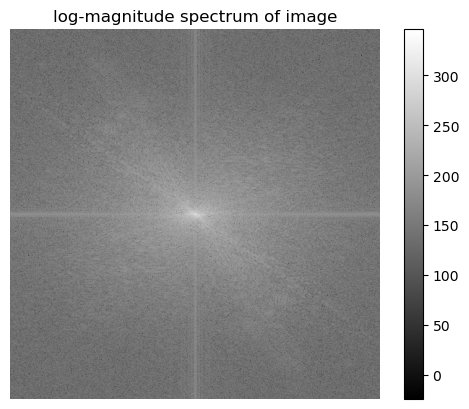

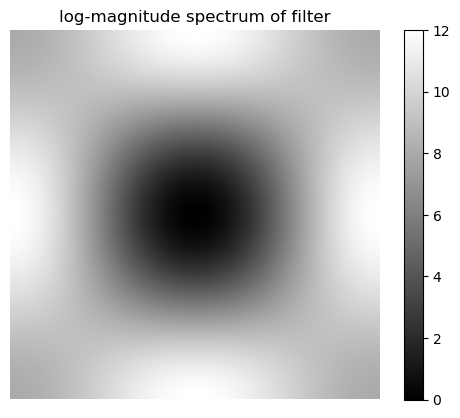

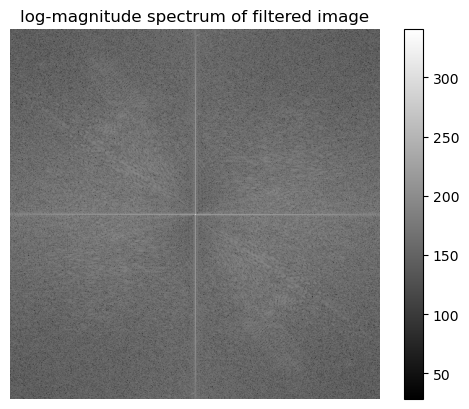

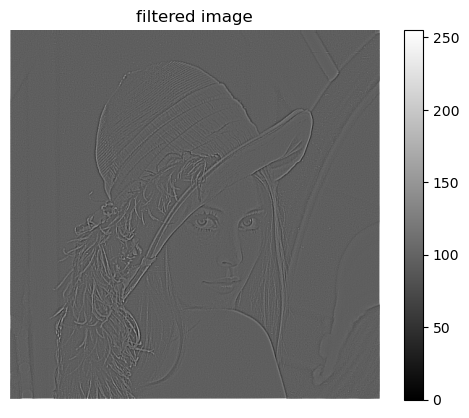

In [6]:
H2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
plot_filtering(image, H2)

![H3](1c_filters_H3.png)

(512, 512)


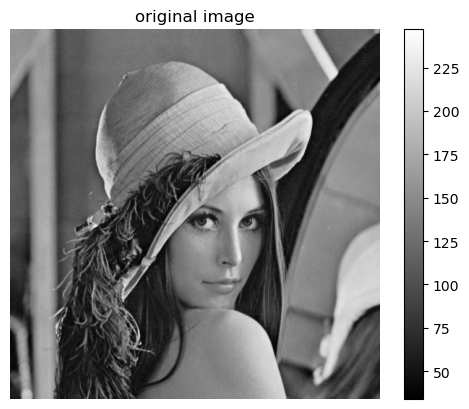

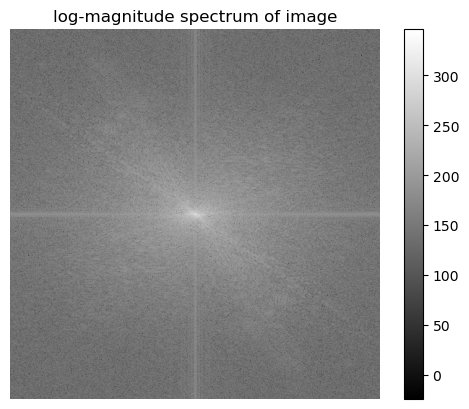

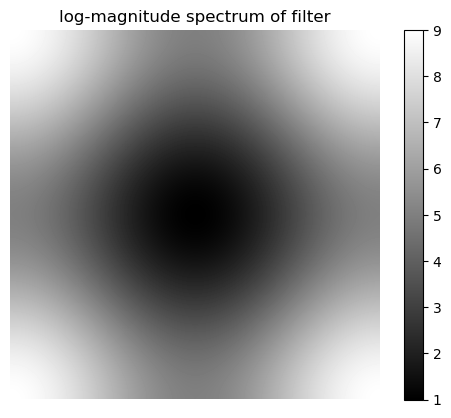

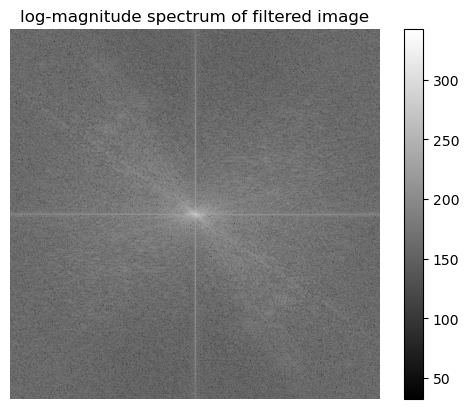

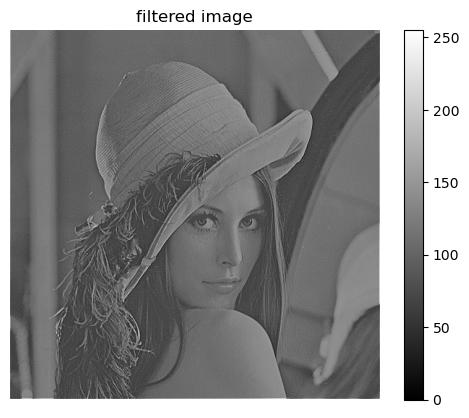

In [7]:
H3 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
plot_filtering(image, H3)